# Setup (Part One)

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.core.display import display
%matplotlib inline

# There Is A Deprecation Warning Flowing From Seaborn Graph Creation.
import warnings
warnings.filterwarnings("ignore")

# Quotation Search (Function)

A major stumbling block for parsing CSV files, is when a Comma is embedded within a set of quotation marks. 

Ordinarily, the Comma would act as a delimiter, however when embedded within a set of quotation marks we should simply ignore it.

Example: "I Think, Therefore I am"

Using a simplistic approach of splitting by Comma alone, we would get: [" I think "][" Therefore I am "]

The Quotation_Search Function recognises a quotation mark. We can query if a quotation is open using "is_quotation_engaged", returning a Boolean True or False. The Boolean Values oscillate between True and False each time a quotation mark is encountered. 

When the Boolean is True, any Commas encountered will NOT split the text.

This also accounts for quotes embedded within quotes. It is customary for these embedded quotations to be double quoted. 

For Example: "I ""Think, "" Therefore I am" will spoduce: ["I ""Think, "" Therefore I am", .., ]

In [2]:
class quotation_search:
    def __init__(self):
        self.state = False
    def quotation_encountered(self):
        if self.state == False:
            self.state = True
        else:
            self.state = False
    def is_quotation_engaged(self):
        return self.state
    

# Split (Function)

The Split Function takes an entire row from the CSV file, and returns a list,  splitting the data by
the delimiter of choice.

Notice that it also takes an input variable split_location. In the main code, we use the Quotation Search Function
to identify the location of the Delimiters (Comma’s) in a row of text, which we can use to split it with.

For example using the string: "I Think Therefore, I Am", "CSV Parsing Is A Pain"

Split Location Should Return [25], which is the comma after Am". Notice that we have ignored the comma after Therefore.



In [3]:
def split(line, split_location):
    split_list = []
    starting_index = 0
    line.rstrip()
    for location in split_location:
        split_data = line[starting_index: location]
        split_list.append(split_data)
        starting_index = location + 1
    split_data = line[starting_index:]
    split_list.append(split_data)
    return split_list

# Delimiter Check (Function)

I have increased functionality by checking the first row of the CSV (Headers), and looking for the existence of "|". The character appears so infrequently in natural language that I will assume it to form the delimiter of choice in place of comma, should it appear.

In [4]:
def delimiter_check(first_sentence):
    if "|" in first_sentence:
        return "|"
    else:
        return ","

# Stray End Comma Adjustment (Function)

This cleans up any stray commas at the end of each row of text in the CSV document. This recognises the fact that row endings should not be marked by a delimiter. 

In [5]:
def stray_end_comma_adjustment(final_char_position, split_location_array, number_of_columns):
    """ A Line Which Contains A Trailing Comma ("DateTime,"mm",)
        Will Over State The Number of Columns.
        Action: Reduce The Column Count By One"""
    if (final_char_position - 1) == split_location_array[-1]:
         number_of_columns -= 1
    return number_of_columns

# Cleanse Split Heading Data (Function)

The Function takes a list of already split data, and "cleanses" it.

This involves removing quotation marks using regular expressions, and also removing white space using the  .strip() function.

When the data is clean and in a useable format, it will be exported to a Python Dictionary, where the Headings
will act as Keys, and the Dictionary Values initialised as an empty list (we will add the data afterwards)

For Example: data_frame_dictionary = {
                                        DateTime: [],
                                        mm: [], ...,
                                        }


In [6]:
def cleanse_split_heading_data(split_columns):
    column_headings = []
    data_frame_dictionary = {}
    for column in split_columns:
        # Remove White Space
        column = column.strip()
        
        # Regular Expressions To Format The Data Nicely
        column = re.sub(r'^"|"$', '', column)
        column_headings.append(column)
        
        # Add The Column Headings To Data_Frame_Dictionary As Keys
        data_frame_dictionary[column] = []
    if column_headings[-1] == "":
        column_headings = column_headings[:-1]
    
    return column_headings, data_frame_dictionary

# Format Date (Function)

Dates can be written in many different ways, and as such the code should not implode when it encounters variation.
I have used the datetime module to account for variation.

The code should be able to deal with:
    
    i)   The American/British variation
    ii)  Long form: 12th September 2020, September 12th 2020
    iii) Different modes of separating dates, commas, hyphens, forward slashes etc
    
If the date is still invalid, then I will return NaN. Later in the code, rows which exhibit NaN will be dropped from the DataFrame table.

In [7]:
def format_date(date):
    try:
        formated_date = pd.to_datetime(date)
        return formated_date
    except:
        try:
            date_object = datetime.strptime(date, "%Y %d %m")
            formated_date = pd.to_datetime(date_object)
            return formated_date
        except:
            try:
                date_object = datetime.strptime(date, "%Y, %m %d")
                formated_date = pd.to_datetime(date_object)
                return formated_date
            except:
                try:
                    date_object = datetime.strptime(date, "%Y, %d, %m")
                    formated_date = pd.to_datetime(date_object)
                    return formated_date
                except:
                    try:
                        date_object = datetime.strptime(date, "%Y-%d-%m %H:%M:%S")
                        formated_date = pd.to_datetime(date_object)
                        return formated_date
                    except:
                        try:
                            date_object = datetime.strptime(date, "%m-%d-%Y %H:%M:%S")
                            formated_date = pd.to_datetime(date_object)
                            return formated_date
                        except:
                            try:
                                date_object = datetime.strptime(date, "%d-%m-%Y %H:%M:%S")
                                formated_date = pd.to_datetime(date_object)
                                return formated_date
                            except:
                                try:
                                    date_object = datetime.strptime(date, "%Y-%d-%m")
                                    formated_date = pd.to_datetime(date_object)
                                    return formated_date
                                except:
                                    try:
                                        date_object = datetime.strptime(date, "%m-%d-%Y")
                                        formated_date = pd.to_datetime(date_object)
                                        return formated_date
                                    except:
                                        try:
                                            date_object = datetime.strptime(date,"%d-%m-%Y")
                                            formated_date = pd.to_datetime(date_object)
                                            return formated_date
                                        except:
                                            try:
                                                date_object = datetime.strptime(date,"%Y/%d/%m %H:%M:%S")
                                                formated_date = pd.to_datetime(date_object)
                                                return formated_date
                                            except:
                                                try:
                                                    date_object = datetime.strptime(date,"%m/%d/%Y %H:%M:%S")
                                                    formated_date = pd.to_datetime(date_object)
                                                    return formated_date
                                                except:
                                                    try:
                                                        date_object = datetime.strptime(date, "%d/%m/%Y %H:%M:%S")
                                                        formated_date = pd.to_datetime(date_object)
                                                        return formated_date
                                                    except:
                                                        try:
                                                            date_object = datetime.strptime(date, "%Y/%d/%m")
                                                            formated_date = pd.to_datetime(date_object)
                                                            return formated_date
                                                        except:
                                                            return np.nan

# Create Data Frame (Function)

We wish to take a File as input, and use the Python IO Functions to ingest it, and then we will use the Functions above to parse it into a Python Dictionary.

FInally we convert the Python Dictionary into a Pandas DataFrame.

The Function also accounts for:

    i)   When a row has more values in it than Headers (simply ignore the values)
    ii)  When a row has less values in it than Headers (assign a value of NaN to the missing value)
    iii) If the CSV has a blank line we simply ignore it


In [8]:
    
# encoding='utf-8-sig'
def create_data_frame(file_name):
    with open(file_name, "r", encoding='utf-8-sig') as f_handle:

        # The Data Frame Dictionary Will Be Used To Create A Pandas DataFrame
        data_frame_dictionary = {}

        # List Of Column Headings Allows Us To Reference The Array As We Store Data Into The Correct Column
        column_headings = []

        # Create The Lines Object (The Entire Data Split Into Sentences)
        sentences = f_handle.readlines()

        # We Need To Keep Track Of Quotation Marks, As Delimiters Symbols Which Are Surrounded By Quotation
        # Marks Must Be Ignored.
        quotation_obj = quotation_search()

        # Counter == 0 Allows Us Check The First Row, Which Is Needed For Headers
        counter = 0
        number_of_columns = 1
        for line in sentences:
            # Ignore Blank Lines
            if line == "\n":
                continue
            delimiter_count = 0
            # The First Row Is The Headers
            split_location = []
            if counter == 0:
                # Establish What The Delimiter Is
                delimiter = delimiter_check(line)
                for char_position, char in enumerate(line):
                    if char == "\"":
                        quotation_obj.quotation_encountered()
                    if char == delimiter and quotation_obj.is_quotation_engaged() == False:
                        split_location.append(char_position)
                        number_of_columns += 1
                # Stray End Comma Adjustment
                number_of_columns = stray_end_comma_adjustment(char_position,split_location,number_of_columns)
                split_columns = split(line.rstrip(), split_location)


                # Cleanse The Split Headers Data
                column_headings, data_frame_dictionary = cleanse_split_heading_data(split_columns)
                counter = counter + 1
            
           
        # Dealing With The MAIN DATA (Row 1 +) - (Not Headers)
            else:
                for char_position, char in enumerate(line):
                    if char == "\"":
                        quotation_obj.quotation_encountered()
                    
                    # A Comma Engaged Unbounded By Quotation Marks Is A Split Point
                    # Record The Location In The Line So We Can Split It
                    if char == delimiter and quotation_obj.is_quotation_engaged() == False:
                        delimiter_count = delimiter_count + 1
                        
                        # Ignore Columns With No Header
                        if delimiter_count == number_of_columns:
                            break
                        else:
                            split_location.append(char_position)
                split_data = split(line[:char_position].rstrip(), split_location)
                
                for i in range(len(split_data)):
                    if split_data[i] == "":
                        data_frame_dictionary[column_headings[i]].append(np.nan)
                    else:
                        
                        # Cleanse Data
                        if column_headings[i] == "DateTime":
                            split_data[i] = re.sub(r'^"|"$', '', split_data[i])
                            formated_date = format_date(split_data[i])
                            data_frame_dictionary[column_headings[i]].append(formated_date)
                        else:
                            split_data[i] = re.sub(r'^"|"$', '', split_data[i])
                            
                            # Ensure Values Are Float DataTypes
                            split_data[i] = split_data[i].strip()
                            try:
                                split_data[i] = float(split_data[i])
                            except:
                                split_data[i] = re.sub(r'^"|"$', '', split_data[i])
                            data_frame_dictionary[column_headings[i]].append(split_data[i])

                row_number_of_columns = len(split_data)
                
                # Account For Rows Which Are Missing Values, i.e. They Have Fewer Values Than The Number of Headers
                # In The Data. We Will Assume That The Value Is NaN.
                if row_number_of_columns < number_of_columns:
                    for i in range(row_number_of_columns,number_of_columns):
                        data_frame_dictionary[column_headings[i]].append(np.nan)
    
    return data_frame_dictionary

# Main Driver Code

We iterate through each file, and convert the data into a Python Dictionary. The Python Dictionary is then converted into a DataFrame. 

If multiple files are given, the program will combine the DataFrames using the Merge Function within the Pandas Library. 

Pandas DataFrames With Non Unique Columns: To account for this, each heading is saved with a portion of the file name as a marker using the suffixes parameter in the Merge Function. This will ensure that it is identifiable in the final merged DataFrame. For example "temperature_indoor".

If two Data Frames have a row which is not common to both, instead of deleting it when merging, it is included at the end (how="outer")

Finally, NaN DateTImes are dropped from the final DataFrame using the dropna() function. A data point which we cannot assign to a date is not useful, and thereby safer to discard.




# IMPORTANT: 
Filenames to be imported. MANUALLY UPDATE THE CODE BELOW with the filenames you wish to import.
If more than one filename is given, the program will merge the two DataFrames automatically.

In [9]:
file_name = ["barometer-1617.csv", "indoor-temperature-1617.csv", "outside-temperature-1617.csv","rainfall-1617.csv"]

Run Code Below

In [10]:
i = 0
data_frame = None
previous_file = None
for file_csv in file_name:
    data_frame_dictionary = create_data_frame(file_csv)
    data_frame_dictionary = pd.DataFrame.from_dict(data_frame_dictionary, orient='index').transpose()
    frame = pd.DataFrame(data_frame_dictionary)
    split_file_name = re.findall(r"[\w']+", file_csv)
    if i == 0:
        data_frame = frame
        i = i + 1
        previous_file = split_file_name[0]
    else:
        # Not All Of The Data Frames Have The Same Number Of Rows. The Default Position
        # For Merge Is To Delete Rows Which Are Uncommon To The Data Frames Being Merged
        # how="outer" ensures that unique rows are not deleted when merged
        data_frame = pd.DataFrame.merge(frame, data_frame, on="DateTime",how='outer', suffixes=(f"_{split_file_name[0]}",f"_{previous_file}")).fillna(np.nan)
        previous_file = split_file_name[0]
        
# Drop Dates Which Are Not Are NaN - (If We Can't Categorise It By Date, Then It Is Useless)
data_frame = data_frame.dropna(subset = ['DateTime'])

# Produce Final DataFrame

This will produce the final data as requested by the assignment instructions. It will diplay the first 10 rows, however, please feel to adjust this.

In [11]:
number_of_rows = 10

pd.set_option('max_colwidth', 10)
display(data_frame.head(number_of_rows).style)

,DateTime,mm,Temperature_outside,Temperature_range (low)_outside,Temperature_range (high)_outside,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Baro
0,2016-10-09 00:00:00,0.000000,10.660000,7.200000,13.800000,54.000000,21.930000,21.000000,22.800000,1021.900000
1,2016-10-10 00:00:00,0.000000,8.940000,5.600000,12.800000,52.000000,21.770000,20.400000,23.600000,1019.900000
2,2016-10-11 00:00:00,0.000000,8.690000,5.300000,14.300000,51.000000,21.360000,19.900000,23.000000,1015.800000
3,2016-10-12 00:00:00,0.000000,11.550000,9.000000,14.900000,51.000000,21.440000,20.000000,23.600000,1013.200000
4,2016-10-13 00:00:00,0.000000,9.400000,6.000000,13.300000,52.000000,21.220000,20.100000,22.300000,1005.900000
5,2016-10-14 00:00:00,1.100000,9.850000,6.800000,13.300000,52.000000,21.020000,19.600000,22.600000,998.600000
6,2016-10-15 00:00:00,2.100000,10.720000,8.200000,14.700000,53.000000,21.400000,20.300000,22.500000,998.000000
7,2016-10-16 00:00:00,8.400000,11.280000,7.800000,14.500000,53.000000,21.430000,20.000000,23.000000,1002.200000
8,2016-10-17 00:00:00,1.100000,11.840000,10.000000,15.000000,53.000000,21.670000,20.500000,22.700000,1009.800000
9,2016-10-18 00:00:00,3.100000,10.240000,8.200000,12.700000,54.000000,21.750000,20.600000,23.100000,1013.400000


# Statistics (Part Two)

Produce The Values For:

    i)   Averages
    ii)  Standard Deviation
    iii) Minimum Value
    iv)  Maximum Value
    
# Important: 

I have excluded NaN. This is equivalent to setting those missing values to the average for it's respective column. Therefore the absence of missing values will not skew the final results.




In [12]:
header = [column for column in data_frame.head(0)]
Averages = [[header, pd.to_numeric(data_frame[header],errors='coerce').mean(skipna=True),pd.to_numeric(data_frame[header],errors='coerce').std(skipna=True),
             pd.to_numeric(data_frame[header],errors='coerce').min(skipna=True),pd.to_numeric(data_frame[header],errors='coerce').max(skipna=True)]
            for header in [column for column in data_frame.head(0)] if header != "DateTime"]

table = pd.DataFrame(Averages, columns=["DataType", "Averages", "Standard Deviation", "Minimum Value", "Maximum Value"])
display(table.style)


,DataType,Averages,Standard Deviation,Minimum Value,Maximum Value
0,mm,1.553125,3.328302,0.000000,23.200000
1,Temperature_outside,11.138877,5.355042,-1.810000,26.380000
2,Temperature_range (low)_outside,7.865634,4.878930,-4.100000,18.700000
3,Temperature_range (high)_outside,15.522535,7.034981,1.500000,38.500000
4,Humidity,48.519774,5.188886,37.000000,59.000000
5,Temperature_indoor,21.827885,2.058307,18.040000,29.210000
6,Temperature_range (low)_indoor,20.555932,2.405125,14.900000,28.200000
7,Temperature_range (high)_indoor,23.532768,1.702157,19.700000,31.100000
8,Baro,1009.996338,9.868772,979.600000,1035.600000


# Visualising Data
# Seaborn Configured For Heading Columns With Preloaded Merged Table

The work below formed part of the process to contextualise the data to understand its form. 

It is not strictly linked to Part One or Two, however the inferences drawn from the process in this part were vital in the final conclusions reached in the PDF document submitted for introducing outliers etc. 

# Distribution Plot: Temperature_Outside

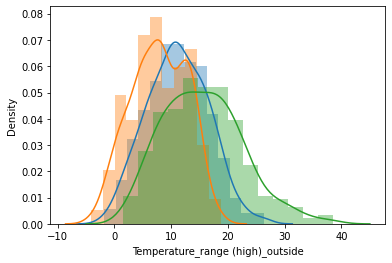

In [13]:
try:  
    sns.distplot(data_frame["Temperature_outside"])
    sns.distplot(data_frame["Temperature_range (low)_outside"])
    sns.distplot(data_frame["Temperature_range (high)_outside"])
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")

# Distribution Plot: Temperature_indoor

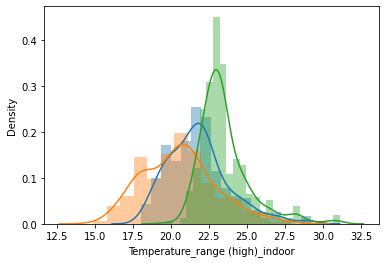

In [14]:
try:
    sns.distplot(data_frame["Temperature_indoor"])
    sns.distplot(data_frame["Temperature_range (low)_indoor"])
    sns.distplot(data_frame["Temperature_range (high)_indoor"])
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")
    

# Distribution Function: Humidity

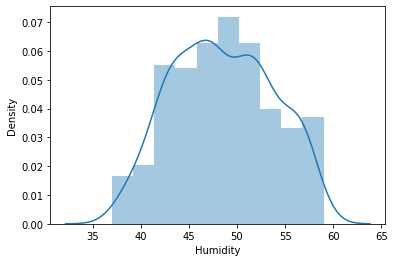

In [15]:
try:
    sns.distplot(data_frame["Humidity"])
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")

# Scatter Plot: Temperature Outside x DateTime

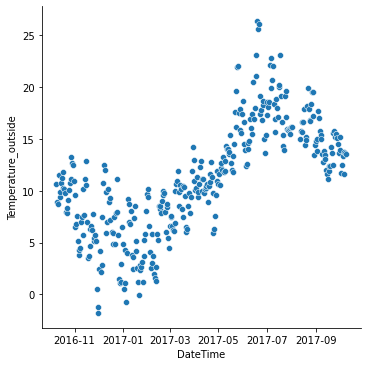

In [16]:
try:
    sns.relplot(x="DateTime", y="Temperature_outside",data=data_frame)
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")

# Scatter Plot: Temperature Indoor x DateTime

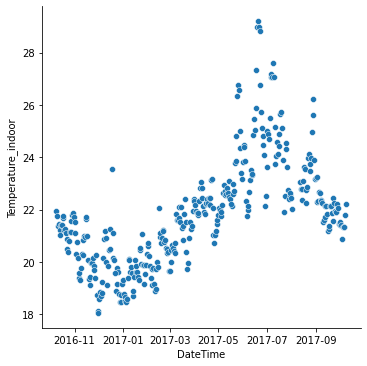

In [17]:
try:
    sns.relplot(x="DateTime", y="Temperature_indoor",data=data_frame)
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")

# Scatter Plot: Humidity x DateTime

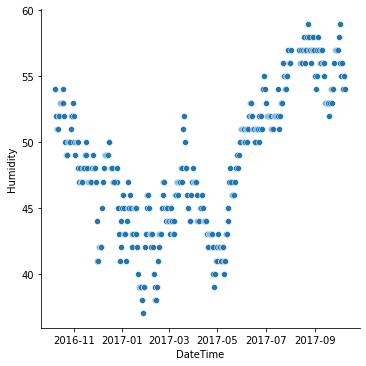

In [18]:
try:
    sns.relplot(x="DateTime", y="Humidity",data=data_frame)
except:
    print("Seaborn Set Up For Preloaded CSV Files. Amend The Headings Above If You Wish")
